In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# [Subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of __subplots__: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.



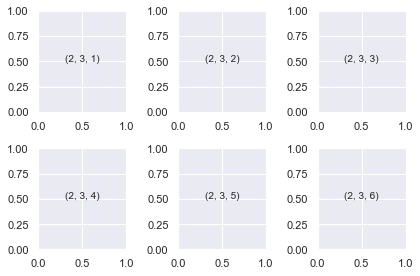

In [2]:
for i in range (1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5,0.5, str((2, 3, i)), ha='center', fontsize = 10)
    plt.tight_layout()

`plt.subplot(xyz)` or `plt.subplot(x,y,z)`  where x = no of rows, y = no of columns, z = plot number.  

`plt.subplot(231)` indicates 2*3 matrix and plot no 1.

### What is figure & axes?

__Figure:__ It is the topmost layer of the plot (kind of big-picture).  
Figure constitutes of subplots, sub axis, titles, subtitles, legends, everything inside the plot but an overview.  


__Axes:__ It’s a part of the Figure. Axes define a subplot, we can write our own x-axis limits, y-axis limits, their labels, the type of graph. It controls every detail inside the subplot.

#### Small multiples with plt.subplots

We’ve been using `plt.subplots` so far to yell at matplotlib, “hey, prepare a graph!”. Then when we use `df.plot` we pass `ax` to put all of our data into that one particular graph.

In [3]:
df = pd.DataFrame()
df['a'] = list(range(1,11))
df['b'] = df['a'] + 10
df.head()

,a,b
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15


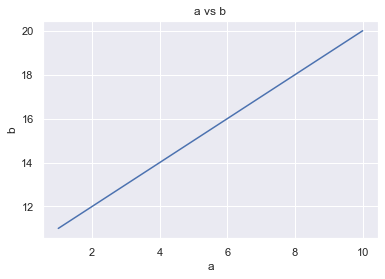

In [4]:
fig,ax = plt.subplots()
sns.lineplot(data = df, x = 'a', y = 'b', ax = ax);
ax.set_title('a vs b');

### Passing `ax` around
If we use `.plot` twice but give them both the same ax, the elements will be plotted on the same graph.

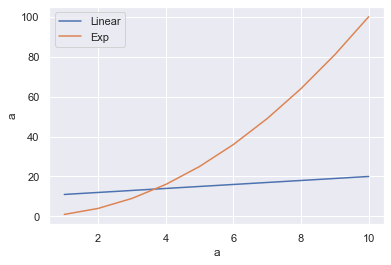

In [5]:
fig,ax = plt.subplots()
sns.lineplot(df.a, df.b, ax = ax, label = 'Linear');
sns.lineplot(df.a, df.a ** 2, ax = ax, label = 'Exp');
plt.show();
ax.set_title("Linear vs Exp");

### Making multiple subplots using loops



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002438C74C7C8>,
      dtype=object)

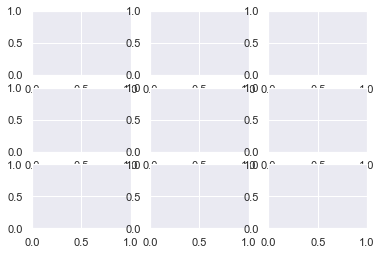

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3)
axes # observe the axes are in a list of list - 3 lists of 3 axes, which will be hard to loop over

Convert it to just one long list using list comprehension

In [7]:
axes_list = [item for sublist in axes for item in sublist]
axes_list

In [8]:
df = pd.read_csv("..\\..\\House prices - Advanced regression techniques\\train.csv")

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

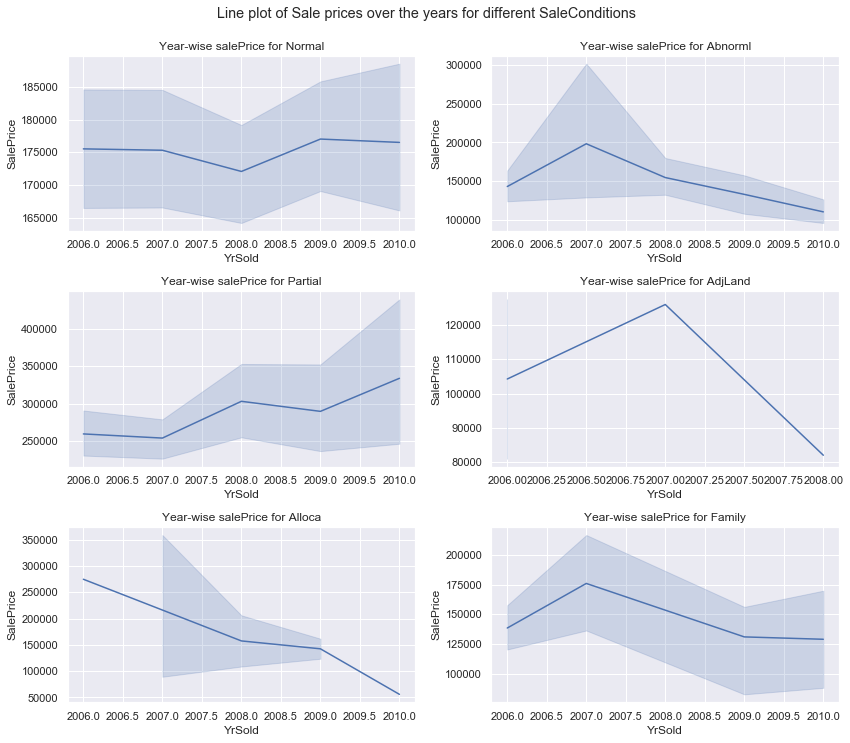

In [12]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(12,10))
axes_list = [item for sublist in axes for item in sublist] 
for cat in df['SaleCondition'].unique():
    ax = axes_list.pop(0) # Take the first axes of the axes_list
    sns.lineplot(data =  df[df['SaleCondition']==cat], x = 'YrSold', y = 'SalePrice', ax=ax)
    ax.set_title('Year-wise salePrice for {}'.format(cat)) # add title to each subplot
    

fig.suptitle("Line plot of Sale prices over the years for different SaleConditions", y = 1.03)
plt.tight_layout()
plt.show()

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

- To adjust the position of the main title of figure use `y` parameter with `fig.suptitle(title, y = 1.05)`
    y : float, default 0.98 - The y location of the text in figure coordinates.

Reference:
1. [Long explanation of using plt subplots to create small multiples](http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/)
2. [Subplots in Matplotlib: A guide and tool for planning your plots](https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857)
3. [What is a subplots in matplotlib?](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib)
4. [Matplotlib — Figure & Axes Explained in Detail | Python](https://medium.com/towards-artificial-intelligence/day-3-of-matplotlib-figure-axes-explained-in-detail-d6e98f7cd4e7)
5. [Adjusting titles for figure](https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot/35676071)
